# Port wavelet method spike detection

In [1]:
%load_ext autoreload
import numpy as np 
import os 

import sys
sys.path.append("/home/timsit/mecp2/python/")
import mea_util
import spike_detection as dspikes
import process_spikes as pspikes
import vizpikes 

# Wavelet

import pywt


# plotting 
import matplotlib.pyplot as plt
import sciplotlib.style as splstyle

## Load some data to test that it is running properly

In [2]:
pre_ttx_path = '/home/timsit/mecp2/data/MPT200209_3A_DIV12.mat'
pre_ttx_data = mea_util.hdf_loadmat(pre_ttx_path)

/home/timsit/mecp2/python/mea_util.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(mat_filepath)


## Go through the code (almost line by line) to check the output is the same

In [3]:
# specify the parameters
signal = pre_ttx_data['dat']
SFr = 25 # in Khz
Wid = [0.5, 1.0]
Ns = 2
option = 'c'
L = 0
wname = 'bior1.5'

In [198]:
# Mean subtraction on the signal so that it has zero-mean
signal = signal - np.mean(signal)

In [199]:
Nt = len(signal)  # number of time poinnts

### Determine scales

In [31]:
_signal = np.zeros(shape=(1000))

In [33]:
dt = 1 / SFr

In [34]:
_signal[499] = 1  # create diract function

In [35]:
Width = np.linspace(Wid[0], Wid[1], Ns)

In [36]:
Eps = 10 ** (-15)

In [37]:
ScaleMax = 3
ScaleMax = ScaleMax * SFr

In [38]:
Scales = np.arange(2, ScaleMax+1)

In [39]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [48]:
print(wavelet_obj)

Wavelet bior1.5
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 10
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False


In [147]:
# c, _ = pywt.cwt(data=_signal, scales=Scales, wavelet='gaus5')
# wavelet_obj = pywt.DiscreteContinuousWavelet('bior1.5')
# wavelet_obj = pywt.ContinuousWavelet('fbsp2-3.0-2.0')
wavelet_obj = pywt.ContinuousWavelet('gaus7')
# c, _ = pywt.cwt(data=_signal, scales=Scales, wavelet=wavelet_obj)

c, _ = pywt.cwt(data=_signal, scales=Scales, wavelet=wavelet_obj)
# c = np.real(c)
# c = np.imag(c)

# c = pywt.swt(data=_signal, wavelet='bior1.5')

In [133]:
np.min(c)

-0.517810758871429

In [118]:
# load the one computed in matlab 
import scipy.io as sio
c = sio.loadmat('/home/timsit/mecp2/python/notebooks/bior1.5waveletC.mat')['c']

### Can gaus5 replace bior1.5

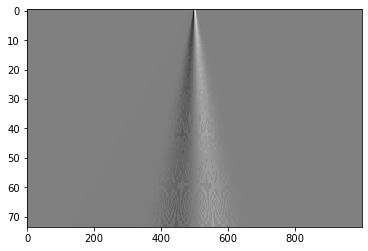

In [134]:
plt.imshow(c, aspect='auto', cmap='gray')

In [135]:
np.min(c)

-0.517810758871429

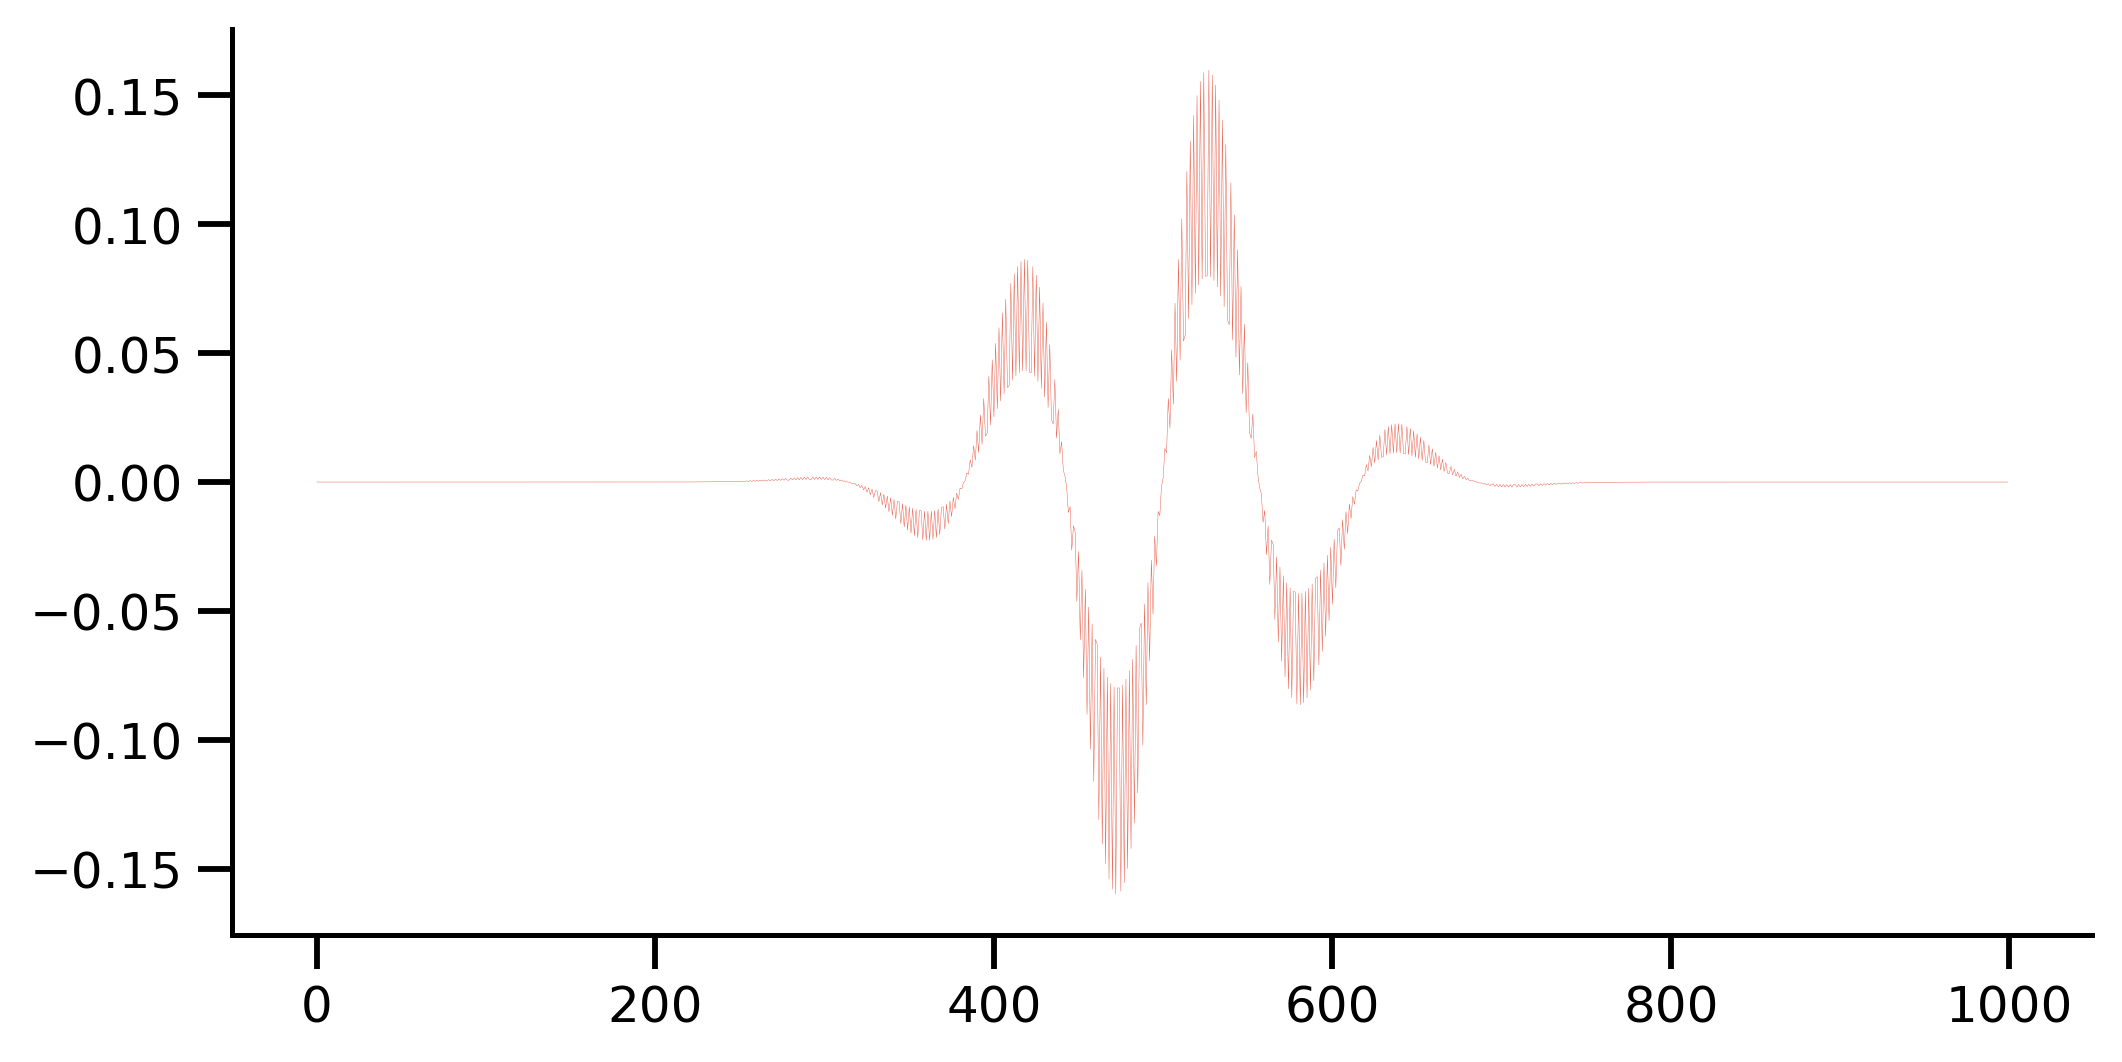

In [148]:
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 4)
    ax.plot(np.arange(1000),c[-6, :], linewidth=0.1)

In [259]:
np.shape(c[-6, :])

(1000,)

In [260]:
# try discrete wavelet transform 
# c = pywt.dwt(data=_signal, wavelet=wname)

# Multilevel decomposition using wavedec 
# c =  pywt.wavedec(data=_signal, wavelet=wname)

# Statinary wavelet transform 
# This has the advnatage of not downsapmling the signal
# c =  pywt.swt(data=_signal, wavelet=wname, level=3)

In [261]:
# np.shape(c[2])

In [262]:
# plt.imshow(c[2], aspect='auto', cmap='gray')

In [267]:
Ind = np.empty(shape=2)
WidthTable = np.empty(shape=len(Scales))

for i in np.arange(len(Scales)):
    # indicators of positive coefficients
    IndPos = (c[i, :] > 0).astype(int)
    # indicators of derivative
    IndDer = np.diff(IndPos)
    if wname == 'sym2':
        # indices of positive slope zero crossings
        IndZeroCross = np.where(IndDer == 1)[0]  
    else:
        # indices of negative slope zero crossings
        IndZeroCross = np.where(IndDer == -1)[0] 
    IndMax = (IndZeroCross > 499).astype(int)
    Ind[1] = np.min(IndZeroCross[np.where(IndMax)]) + 1
    IndMin = (IndZeroCross < 499).astype(int)
    Ind[0] = np.max(IndZeroCross[np.where(IndMin)])
    WidthTable[i] = np.diff(Ind) * dt


In [268]:
WidthTable = WidthTable + np.arange(1, len(Scales)+1) * Eps

# Loop-up table
Scale = np.empty(shape=2)
Scale = np.round(np.interp(xp=WidthTable, fp=Scales, x=Width))  # linear interpolation



In [269]:
Scale

array([ 8., 18.])

In [246]:
np.min(IndZeroCross[IndMax])

313

In [248]:
Scale

array([ 8., 18.])

In [242]:
IndZeroCross

array([313, 315, 320, 328, 345, 379, 448, 549, 618, 652, 669, 678, 682,
       684, 686])

## Plotting the wavelet shapes

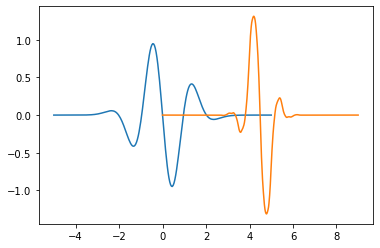

In [142]:
fig, ax = plt.subplots()

wavelet = pywt.ContinuousWavelet('gaus5')
# wavelet_handle = wavelet.wavefun()
wavelet_y, wavelet_x =  wavelet.wavefun()

bior_wavelet = pywt.Wavelet('bior1.5')
bior_output = bior_wavelet.wavefun()
bior_y = bior_output[1]  # quite strange that the first output looks entirely differnt
# why is that, and I can't find this is here either:
# https://uk.mathworks.com/help/wavelet/gs/introduction-to-the-wavelet-families.html
bior_x = bior_output[-1]

ax.plot(wavelet_x, wavelet_y)

ax.plot(bior_x, bior_y)

In [131]:
bior_output[-1]

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       8.98828125e+00, 8.99218750e+00, 8.99609375e+00])

## Continuous wavelet transform or discrete wavelet transform?

In [273]:
Scales

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

# Try directly calling matlab

In [7]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [285]:
A = matlab.double(_signal.tolist())
c = eng.cwt(A,matlab.double(Scales.tolist()),'bior1.5')

In [4]:
np.shape(signal)

(60, 7500000)

In [10]:
channel_trace.tolist()

[-4006.9557,
 -4003.7811,
 -4000.6065,
 -4000.7286,
 -4003.659,
 -4006.8336,
 -4009.3977,
 -4010.985,
 -4011.9618,
 -4013.5491,
 -4012.9386,
 -4009.0314,
 -4007.322,
 -4008.543,
 -4009.2756,
 -4007.4441,
 -4006.3452,
 -4006.101,
 -4004.2695,
 -4001.5833,
 -4002.5601,
 -4005.6126,
 -4005.9789,
 -4005.7347,
 -4005.3684,
 -4004.3916,
 -4005.8568,
 -4008.4209,
 -4006.101,
 -4001.5833,
 -4000.6065,
 -4002.6822,
 -4004.7579,
 -4005.9789,
 -4006.101,
 -4006.9557,
 -4008.9093,
 -4007.6883,
 -4004.7579,
 -4005.2463,
 -4008.0546,
 -4008.7872,
 -4007.1999,
 -4004.1474,
 -4002.1938,
 -4004.6358,
 -4008.6651,
 -4008.4209,
 -4006.101,
 -4007.0778,
 -4009.0314,
 -4007.6883,
 -4003.7811,
 -4000.4844,
 -3999.0192,
 -3999.0192,
 -3998.5308,
 -3998.1645,
 -3997.7982,
 -3995.112,
 -3993.891,
 -3995.6004,
 -3998.6529,
 -4001.217,
 -4001.4612,
 -3999.6297,
 -3998.775,
 -4000.9728,
 -4004.88,
 -4007.5662,
 -4005.6126,
 -4001.4612,
 -3997.3098,
 -3993.2805,
 -3990.3501,
 -3989.3733,
 -3990.1059,
 -3992.5479,


### Directly call the spike detection script

In [26]:
spike_times = eng.detect_spikes_wavelet(matlab.double(channel_trace.tolist()), 25.0, 
                                       matlab.double([0.5, 1.0]), 2.0,
                                      'c', 0.0, 'bior1.5', 0.0, 0.0)

In [28]:
spike_times = np.asarray(spike_times)

In [29]:
spike_times

array([[1312610., 2748775., 2779793., ..., 7499265., 7499357., 7499944.]])

# Some testing of the wavelets

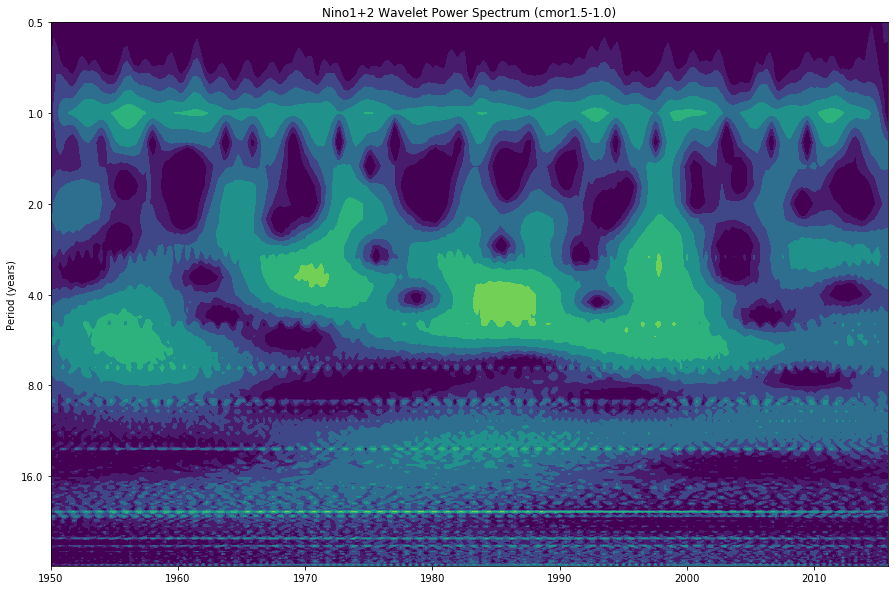

In [53]:
# From: https://github.com/PyWavelets/pywt/blob/580d79d9440ec0f4f936892e39c79ad13a8fd33b/demo/cwt_analysis.py
import numpy as np
import matplotlib.pyplot as plt

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()